In [1]:
from torch_dqn_agent import DQNAgent
from environment import TrafficLightEnv
import utils as utils
import numpy as np

# Hyperparameters

In [2]:
ROAD_COUNTS = 4
CHANGE_SIZE = 10
MAX_STATE_VALUE = 200

In [3]:
EPISODES = 100
EPSILON=1.0
EPSILON_MIN=0.01
EPSILON_DECAY=0.95
LR=0.00025
GAMMA=0.995

# Environment

In [4]:
env = TrafficLightEnv(roads_count=ROAD_COUNTS, change_size=CHANGE_SIZE, max_value=MAX_STATE_VALUE)
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

print('action size', action_size)
print(env.action_space.sample())
print('')
print('state size', state_size)
env.render()

action size 15
14

state size 16
green light timer [191. 174. 156. 110.]
avg waiting times (-) [440. 457. 475. 521.]
vehicles counts (-) [187.  83.  46. 152.]
in counts (+) [ 37. 165.  85. 133.]


# DQN Agent

In [5]:
import torch

agent = DQNAgent(state_size, action_size, epsilon_decay=EPSILON_DECAY, epsilon_min=EPSILON_MIN, lr=LR, gamma=GAMMA)

print('model:', agent.model)

print('')

outputs = agent.model(torch.tensor(env.state, dtype=torch.float).unsqueeze(0))
print('model action output:',[torch.argmax(output).item() for output in outputs])
env.cast_action([torch.argmax(output.clone().detach()) for output in outputs])

model: DQN(
  (fc1): Linear(in_features=16, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=512, bias=True)
  (fc5): Linear(in_features=512, out_features=256, bias=True)
  (fc6): Linear(in_features=256, out_features=128, bias=True)
  (fc7): Linear(in_features=128, out_features=64, bias=True)
  (fc8): Linear(in_features=64, out_features=15, bias=True)
)

model action output: [8]


array([1, 1, 2, 1, 1], dtype=int64)

# Deep Q Learning

In [6]:
# Train the agent
total_rewards = []  # List to store rewards for each episode

for episode in range(1, EPISODES + 1):
    state = env.reset()
    done = False
    episode_reward = []

    while not done:
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        agent.remember(state, action, reward, next_state, done)
        state = next_state
        episode_reward.append(reward)
        env.render()
        print('action:',env.cast_action(action))
        print('\n')

    env.render()
    agent.replay()
    total_rewards.append(episode_reward)
    print(f"Episode: {episode}/{EPISODES}, Total Reward: {np.sum(episode_reward)}\n")

green light timer [ 79.  32. 180.  42.]
avg waiting times (-) [254. 301. 153. 291.]
vehicles counts (-) [ 29. 165. 176. 140.]
in counts (+) [79. 32. 12. 42.]
action: [1 1 1 1 1]


green light timer [ 79.  32. 170.  42.]
avg waiting times (-) [244. 291. 153. 281.]
vehicles counts (-) [151. 182.  92. 124.]
in counts (+) [ 29.  32. 170.  42.]
action: [1 1 0 1 1]


green light timer [ 59.  12. 150.  22.]
avg waiting times (-) [184. 231.  93. 221.]
vehicles counts (-) [123. 179. 124. 139.]
in counts (+) [59. 12. 92. 22.]
action: [1 1 1 1 0]


green light timer [ 69.  22. 160.  32.]
avg waiting times (-) [214. 261. 123. 251.]
vehicles counts (-) [ 65. 173.  90. 187.]
in counts (+) [ 69.  22. 124.  32.]
action: [1 1 1 1 2]


green light timer [ 69.  22. 150.  32.]
avg waiting times (-) [204. 251. 123. 241.]
vehicles counts (-) [ 73. 151. 136. 176.]
in counts (+) [65. 22. 90. 32.]
action: [1 1 0 1 1]


green light timer [ 59.  22. 150.  32.]
avg waiting times (-) [204. 241. 113. 231.]
vehicles

In [7]:
agent.epsilon

0.009888364709658948

In [8]:
agent.model(torch.tensor(env.state, dtype=torch.float).unsqueeze(0))

tensor([[6.8748e+12, 7.3626e+12, 4.7258e+12, 7.3613e+12, 7.7561e+12, 7.6108e+12,
         7.2339e+12, 7.9492e+12, 8.4981e+12, 6.8555e+12, 7.9508e+12, 6.4491e+12,
         6.1735e+12, 7.7695e+12, 8.1058e+12]], grad_fn=<AddmmBackward0>)

# Result

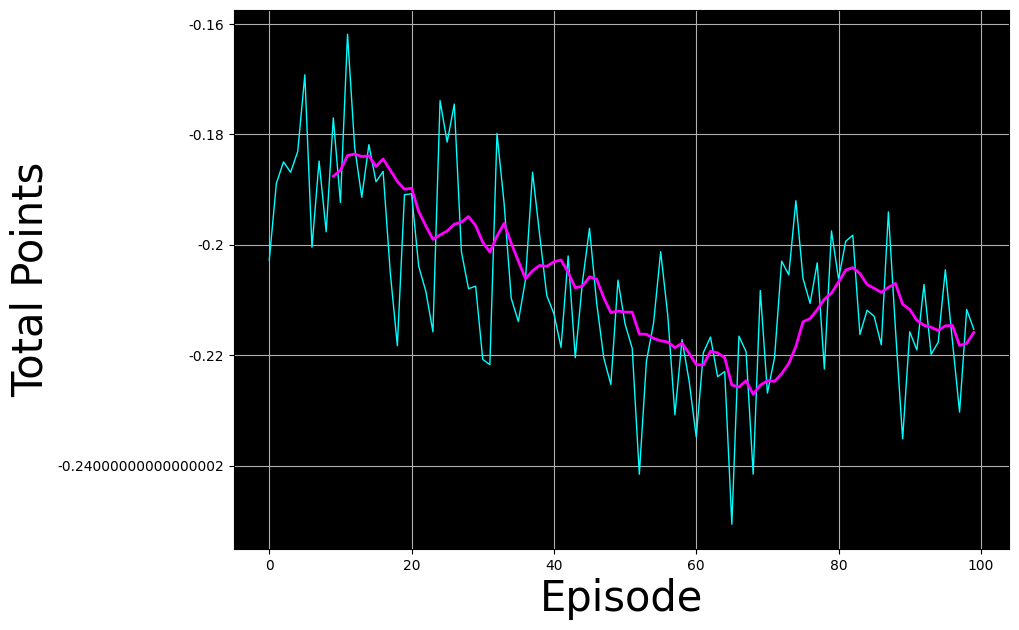

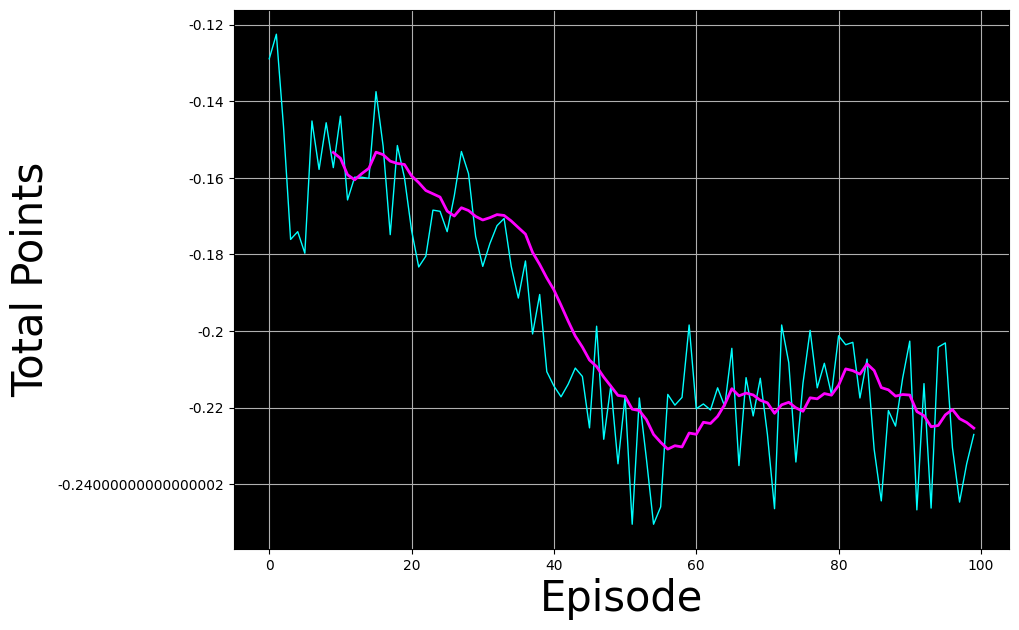

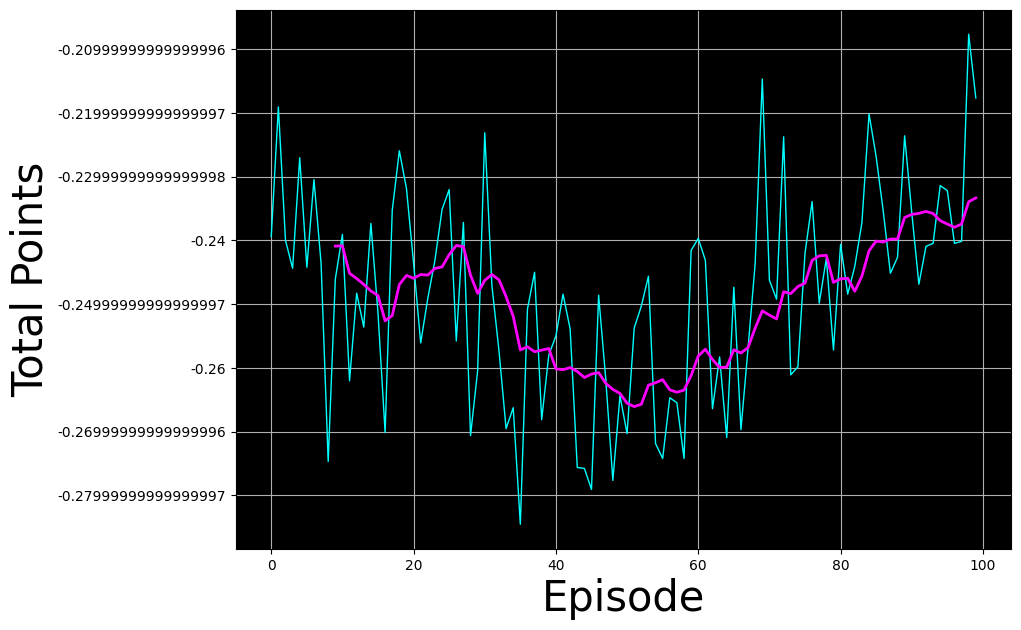

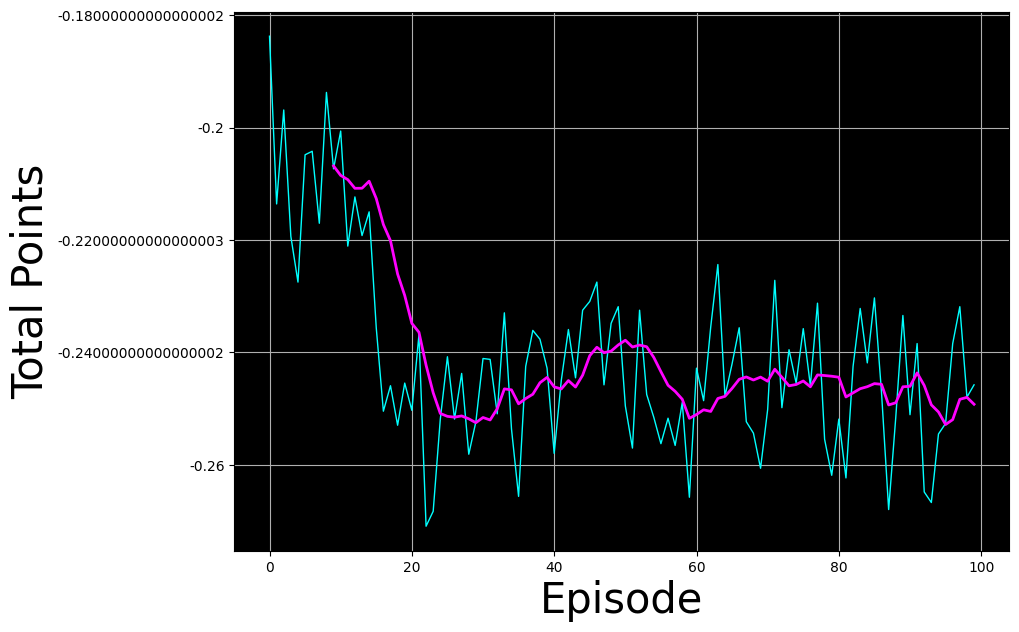

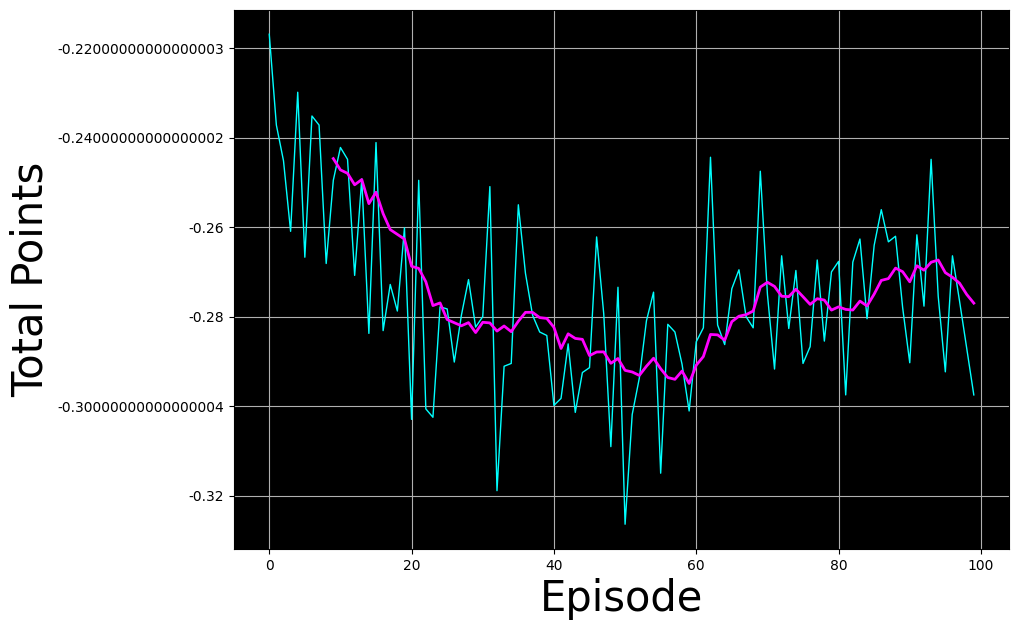

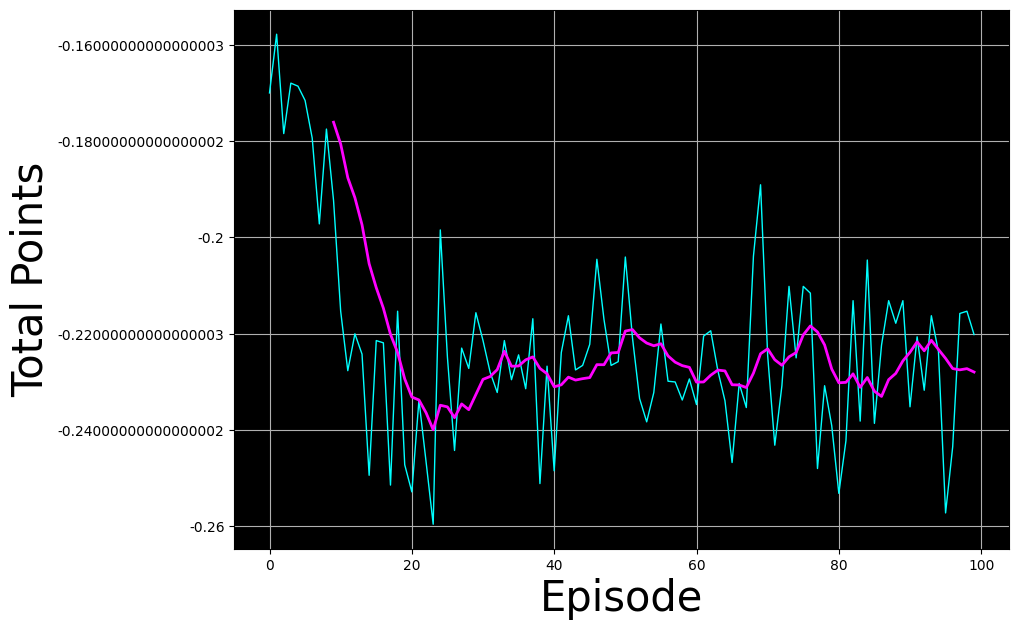

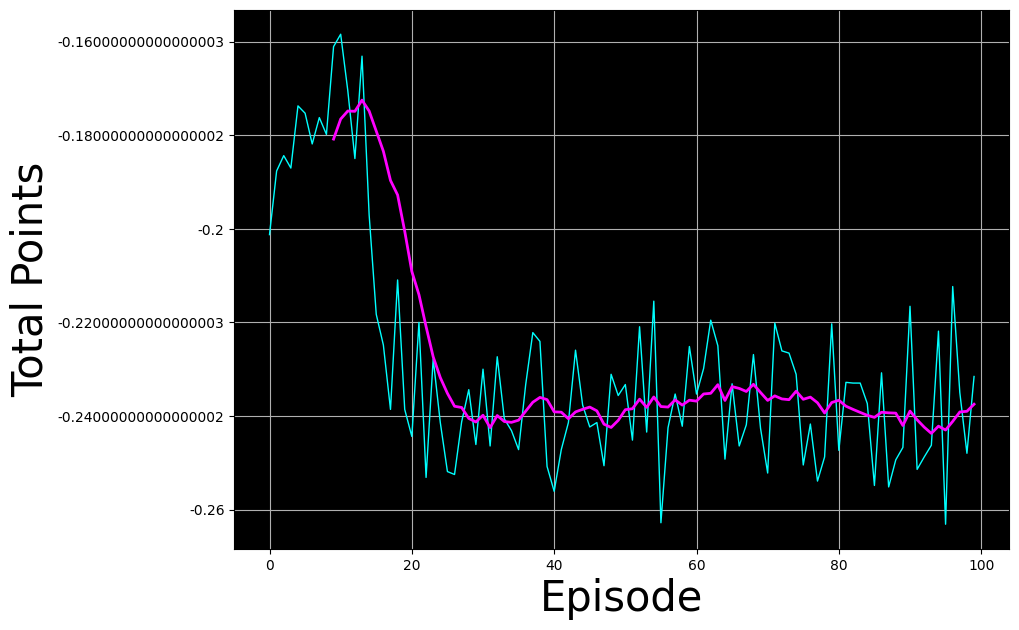

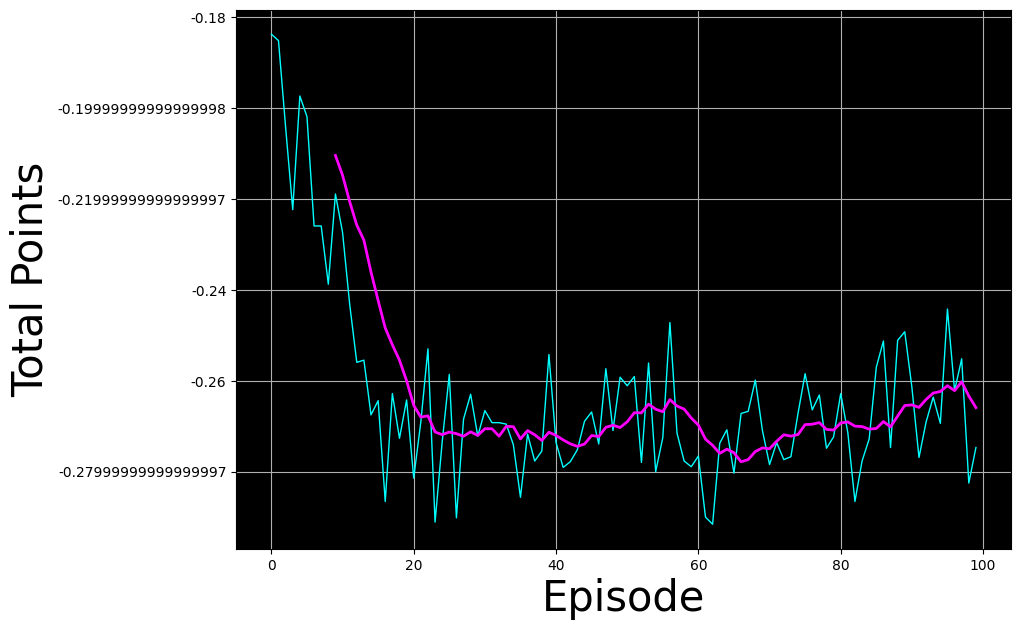

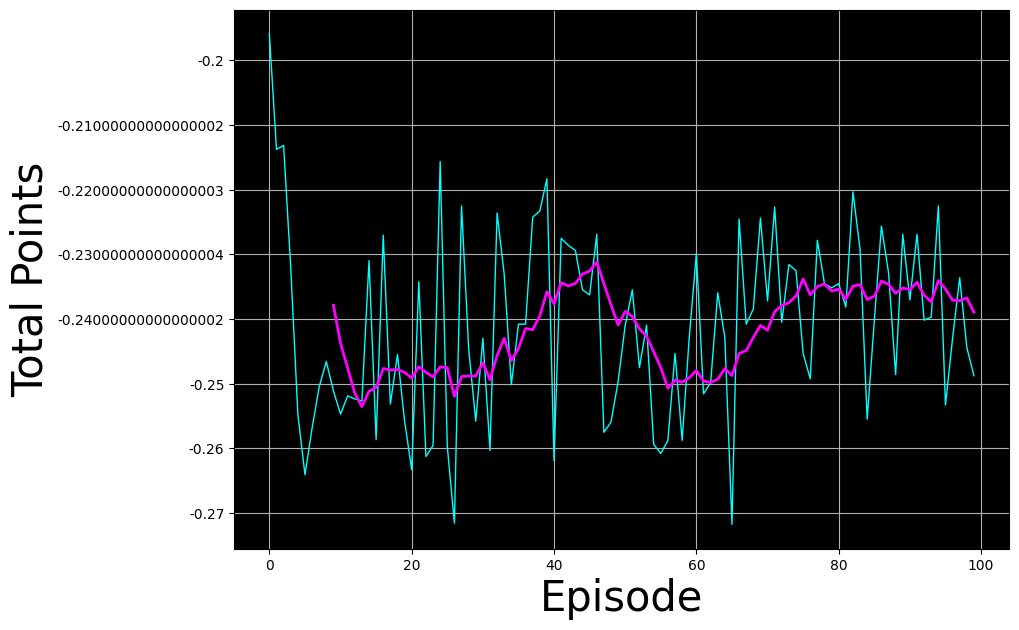

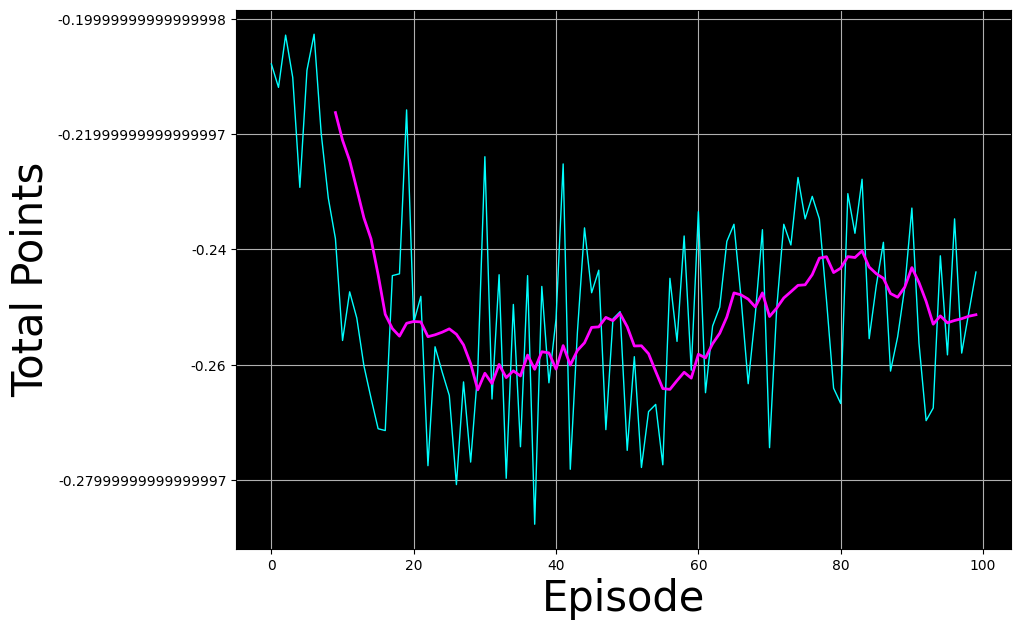

In [9]:
for episode in range(0, EPISODES, EPISODES//10):
    utils.plot_history(total_rewards[episode])

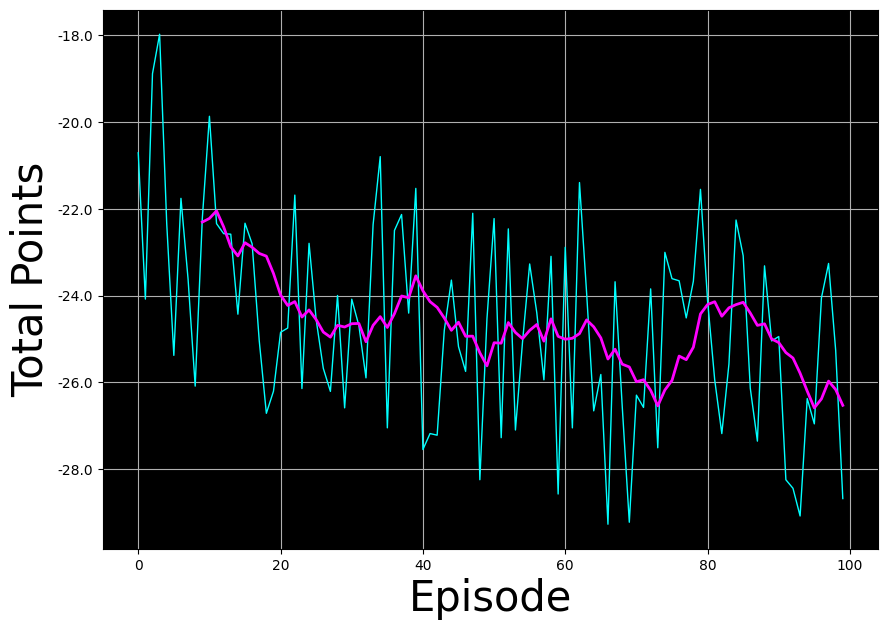

In [10]:
utils.plot_history(np.sum(total_rewards, axis=1))

In [11]:
state = env.reset()
done = False
test_reward = []
while not done:
    env.render()
    state = env.state
    action = agent.act(state)
    print('action taken:', env.cast_action(action))
    print('reward:', reward)
    state, reward, done, _ = env.step(action)
    test_reward.append(reward)
    print('')
env.render()

green light timer [ 13. 186. 170.  83.]
avg waiting times (-) [439. 266. 282. 369.]
vehicles counts (-) [127.  74. 143. 137.]
in counts (+) [ 26. 139.   7. 129.]
action taken: [1 1 2 1 1]
reward: -0.28578125

green light timer [ 13. 186. 180.  83.]
avg waiting times (-) [449. 276. 282. 379.]
vehicles counts (-) [146. 162.  94. 176.]
in counts (+) [ 13.  74. 143.  83.]
action taken: [1 1 2 1 1]
reward: -0.24796875

green light timer [ 13. 186. 190.  83.]
avg waiting times (-) [459. 286. 282. 389.]
vehicles counts (-) [136.  15. 116. 184.]
in counts (+) [ 13. 162.  94.  83.]
action taken: [1 1 2 1 1]
reward: -0.256875

green light timer [ 13. 186. 200.  83.]
avg waiting times (-) [469. 296. 282. 399.]
vehicles counts (-) [147. 180. 139. 140.]
in counts (+) [ 13.  15. 116.  83.]
action taken: [1 1 2 1 1]
reward: -0.28390625

green light timer [ 13. 186. 200.  83.]
avg waiting times (-) [469. 296. 282. 399.]
vehicles counts (-) [184.   3. 153.  58.]
in counts (+) [ 13. 180. 139.  83.]
acti

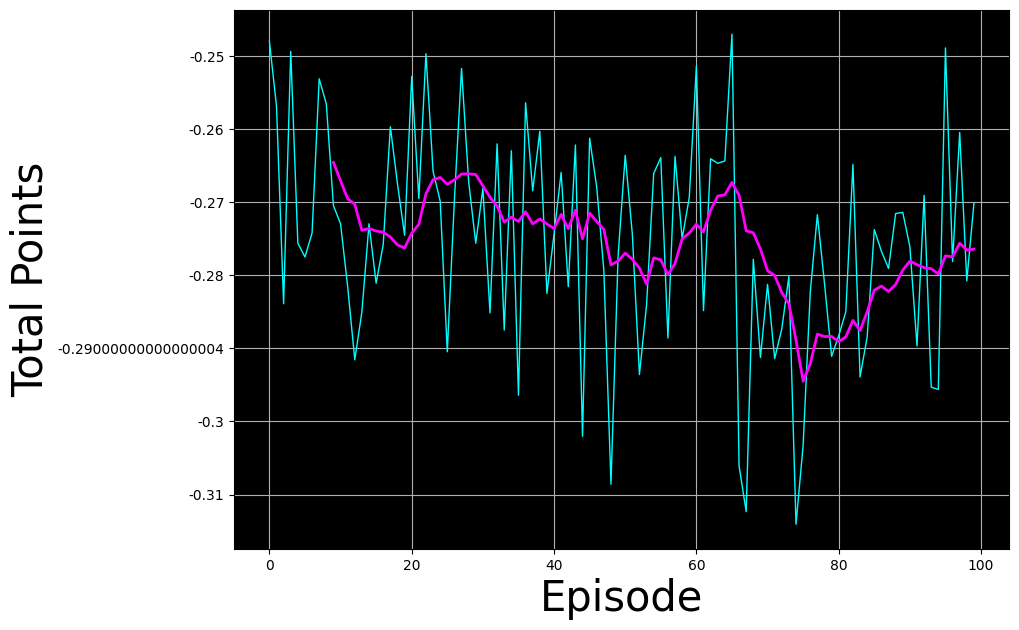

In [12]:
utils.plot_history(test_reward)